# Import

In [91]:
# 데이터 분석
import pandas as pd
import numpy as np
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud
# 정규표현식
import re
import time

In [92]:
# 형태소분석 okt
from konlpy.tag import Okt
okt = Okt()

In [3]:
# Wordcloud Counter
from collections import Counter

## 한글만 남기는 함수

In [4]:
def extract_korean_from_series(series):
    
    # 정규 표현식을 사용하여 한글만 추출 (함수 안에 함수를 정의)
    def extract_korean(text):
        # 한글을 제외한 모든 문자 제거
        text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\s]','',text)
        # 공백 2개 이상인 경우 1개로 변환
        text = re.sub(r'\s+',' ',text)
        return text

    # 시리즈의 각 요소에 대해 한글 추출 함수 적용
    return series.map(extract_korean)

## 형태소 분석 함수 (형용사만)

In [1]:
# # 시리즈에서 중복을 제거한 형용사와 동사 추출 후 리스트로 반환
# def extract_adjectives_from_series_okt(analyzer, series):
    
#     words = set()  # 중복을 제거하기 위해 집합 사용

#     # 시리즈의 각 요소에 대해 반복
#     for i, text in enumerate(series):
#         start = time.time()
#         analyzer_pos = analyzer.pos(text)
#         for word, pos in analyzer_pos:
            
#             if len(word) > 1 and pos == 'Adjective':
#                 words.add((pos, word))

#         print(f'{i+1}번째 수행.../ 소요시간 : {time.time() - start}')

#     # (품사, 단어) 형식의 튜플을 리스트로 변경하여 반환
#     return [[pos, word] for pos, word in words]

# 파일열기

In [107]:
df = pd.read_csv('data/review_data.csv')
df

,name,rate,review,시설분류
0,충청북도 옥천군 가화쌈지숲공원,NaN,?,문화
1,충청북도 옥천군 가화쌈지숲공원,NaN,친절해요,문화
2,충청북도 옥천군 가화쌈지숲공원,NaN,좋아요 만족스러워요,문화
3,충청북도 옥천군 가화쌈지숲공원,NaN,와우~~,문화
4,충청북도 옥천군 가화쌈지숲공원,NaN,굿,문화
...,...,...,...,...
141249,울산광역시 남구 ZOO동물병원,NaN,설사를해서 병원갔어요 배를 만져보고 꼼꼼히 살펴보시더니 약은 안먹어도 되겠다고 하셔...,동물병원
141250,울산광역시 남구 ZOO동물병원,NaN,저희 천사 데려온 곳이고 중성화부터 혈액검사까지 전부 세세하게 봐주셔서 늘 감사드립...,동물병원
141251,울산광역시 남구 ZOO동물병원,NaN,친절하십니다,동물병원
141252,울산광역시 남구 ZOO동물병원,NaN,진료 꼼꼼히 잘봐주세요 진료후 간식도 챙겨주시고 선생님께서 산책 가자고하니 요미가 ...,동물병원


In [108]:
df = df[['review', '시설분류']]
df.head(2)

,review,시설분류
0,?,문화
1,친절해요,문화


In [109]:
df['시설분류'].unique()

array(['문화', '미용', '반려동물용품', '위탁및숙박', '카페및식당', '동물약국', '동물병원'],
      dtype=object)

## 시설분류 필터링

In [110]:
filt_supplies = df['시설분류'] == '반려동물용품'

In [111]:
df_supplies = df[filt_supplies].reset_index(drop=True)
df_supplies

,review,시설분류
0,사장님이 참하시고 친절해요!!!!!!! 가끔 지나가다 개간식 선물하려고 들리는데 개...,반려동물용품
1,젊은 사장님께서 늘 변함없이 친절하고 제품설명도 잘해 주셔요ㅎㅎ사료 잘 안 먹는 우...,반려동물용품
2,우리 멍뭉이 최애 수제간식 맛집~직접 만들어 파시는거라 안심하고 먹여요 우리 멍뭉이...,반려동물용품
3,늘 친절하시고 서비스도 잘 챙겨 주심!,반려동물용품
4,늘 믿고 먹여요 우리 강아지가 완전 좋아합니다ㅎㅎ,반려동물용품
...,...,...
21617,댕댕이 맛집이에요~❤,반려동물용품
21618,배달시켰습니다 ! 이른시간인데도 빨리해주신점 감사합니다ㅎㅎㅎ 서비스도 너무 감사합니...,반려동물용품
21619,충주에 좋은 반려견용품점이 있어서 좋네요 ~^^ 다음에 재방문 할께요 ~.~ 감사합니다,반려동물용품
21620,친절하시고 가격도 저렴하고 좋아요,반려동물용품


## 한글만 추출

In [112]:
df_supplies['review2'] = extract_korean_from_series(df_supplies['review'])

In [113]:
df_supplies

,review,시설분류,review2
0,사장님이 참하시고 친절해요!!!!!!! 가끔 지나가다 개간식 선물하려고 들리는데 개...,반려동물용품,사장님이 참하시고 친절해요 가끔 지나가다 개간식 선물하려고 들리는데 개김밥도 너무 ...
1,젊은 사장님께서 늘 변함없이 친절하고 제품설명도 잘해 주셔요ㅎㅎ사료 잘 안 먹는 우...,반려동물용품,젊은 사장님께서 늘 변함없이 친절하고 제품설명도 잘해 주셔요ㅎㅎ사료 잘 안 먹는 우...
2,우리 멍뭉이 최애 수제간식 맛집~직접 만들어 파시는거라 안심하고 먹여요 우리 멍뭉이...,반려동물용품,우리 멍뭉이 최애 수제간식 맛집직접 만들어 파시는거라 안심하고 먹여요 우리 멍뭉이는...
3,늘 친절하시고 서비스도 잘 챙겨 주심!,반려동물용품,늘 친절하시고 서비스도 잘 챙겨 주심
4,늘 믿고 먹여요 우리 강아지가 완전 좋아합니다ㅎㅎ,반려동물용품,늘 믿고 먹여요 우리 강아지가 완전 좋아합니다ㅎㅎ
...,...,...,...
21617,댕댕이 맛집이에요~❤,반려동물용품,댕댕이 맛집이에요
21618,배달시켰습니다 ! 이른시간인데도 빨리해주신점 감사합니다ㅎㅎㅎ 서비스도 너무 감사합니...,반려동물용품,배달시켰습니다 이른시간인데도 빨리해주신점 감사합니다ㅎㅎㅎ 서비스도 너무 감사합니다 ...
21619,충주에 좋은 반려견용품점이 있어서 좋네요 ~^^ 다음에 재방문 할께요 ~.~ 감사합니다,반려동물용품,충주에 좋은 반려견용품점이 있어서 좋네요 다음에 재방문 할께요 감사합니다
21620,친절하시고 가격도 저렴하고 좋아요,반려동물용품,친절하시고 가격도 저렴하고 좋아요


# WordCloud

## 명사만 뽑아서 보기

In [117]:
# # 부정인 데이터만 (명사)
# for index, row in df_supplies.iterrows():
#     print(okt.nouns(row['review']))

## 반려동물용품

### 반려동물용품 (df_supplies) - 명사

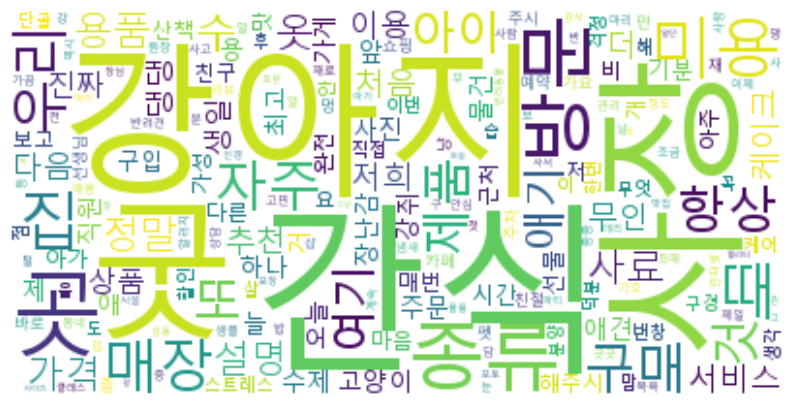

In [118]:
noun_list = []

# DataFrame의 각 행을 반복하면서 명사 추출
for index, row in df_supplies.iterrows():
    nouns = okt.nouns(row['review2'])
    noun_list.extend(nouns)

# 명사 리스트를 카운트하여 가장 많이 등장한 명사 순으로 정렬
noun_counts = Counter(noun_list)

# WordCloud 객체 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white').generate_from_frequencies(noun_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 반려동물 용품 (df_supplies) - 형용사

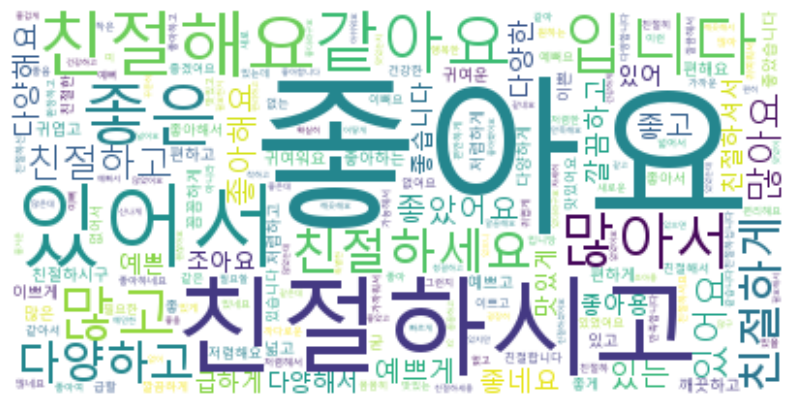

In [119]:
adjective_verb_list = []

# DataFrame의 각 행을 반복하면서 형용사와 동사 추출
for index, row in df_supplies.iterrows():
    analyzer_pos = okt.pos(row['review2'])
    for word, pos in analyzer_pos:
        if pos == 'Adjective':
            adjective_verb_list.append(word)

# 형용사와 동사 리스트를 카운트하여 가장 많이 등장한 단어 순으로 정렬
adjective_verb_counts = Counter(adjective_verb_list)

# WordCloud 객체 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white').generate_from_frequencies(adjective_verb_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()